<a href="https://colab.research.google.com/github/DRodriguez615/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [88]:
# Mean
# without using library functions add all sales together
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689] #last weeks sales
total = sum(sales) #sum of sales
print('Sales Total:',total)
mean_sales = total/len(sales) # calculating the mean
print('Mean:', mean_sales)

Sales Total: 21369
Mean: 3052.714285714286


In [90]:
# Variance
# calculating each sales difference from the mean
# first writing a function
lambda x: x-mean_sales

<function __main__.<lambda>>

In [93]:
# each sales difference from the mean
differences = list(map(lambda x: x-mean_sales, sales))
differences

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [94]:
# take each difference and square it, then average the result
# using whole number shown, should just round but doing it this way..
sq_differences = list(map(lambda x: x**2, differences))
sq_differences

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
# a little confused wether we take this as a sample or population
# will just do both
length_samp = len(sq_differences)-1 #sample
length_pop = len(sq_differences)

In [99]:
# calculate variance
variance_sales = sum(sq_differences)/length_samp
print("Variance:",'{:.2f}'.format(variance_sales))

# population variance
variance_sales = sum(sq_differences)/length_pop
print("Variance:",'{:.2f}'.format(variance_sales))

Variance: 214387.90
Variance: 183761.06


In [0]:
import math

In [106]:
# Standard Deviation
# take the square root of Variance
std_sales = math.sqrt(variance_sales)
print('Standard Deviation:', ("{:.4f}".format(std_sales)))

Standard Deviation: 428.6736


In [47]:
# mean, variance, and standard deviation
print('Mean:', ("{:.4f}".format(mean_sales)))
print('Variance:', ("{:.4f}".format(variance_sales)))
print('Standard Deviation:', ("{:.4f}".format(std_sales)))

Mean: 3052.7143
Variance: 144448.4072
Standard Deviation: 380.0637


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd
import numpy as np

In [48]:
# looking back at last weeks sales
sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [78]:
# making our list of numbers of customers from last week
num_customers = [127, 80, 105, 92, 120, 115, 93]
# calculating covariance using numpy
CV = np.cov(sales, num_customers )[0][1]
print('Covariance:', CV)

Covariance: 7604.357142857142


7604.357142857142

In [79]:
np.cov(sales,num_customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [66]:
# finding the standard deviation of customers from last week
# first we have to get the mean and variance of num_customers
# Mean
total_cust = sum(num_customers)
mean_cust = total_cust/len(num_customers)
print('Mean of Customers:',mean_cust)
print('Mean:',np.mean(num_customers))

Mean of Customers: 104.57142857142857
Mean: 104.57142857142857


In [51]:
# Variance
def subtract_mean(point):
  return point - mean_cust

# taking the function and applying to list
differences = list(map(subtract_mean, num_customers))
differences

[22.42857142857143,
 -24.57142857142857,
 0.4285714285714306,
 -12.57142857142857,
 15.42857142857143,
 10.42857142857143,
 -11.57142857142857]

In [52]:
# now to square and sum the differences
sq_differences = list(map(lambda x: x**2, differences))
sq_differences

[503.0408163265307,
 603.7551020408163,
 0.18367346938775683,
 158.04081632653057,
 238.0408163265307,
 108.75510204081637,
 133.89795918367344]

In [64]:
# making the length of the list length_cust
length_cust = len(sq_differences)

# calculate the variance
variance_cust = sum(sq_differences)/length_cust
print('Variance:', '{:.2f}'.format(variance_cust))
print('Variance:',np.var(num_customers))

Variance: 249.39
Variance: 249.3877551020408


In [65]:
# now we can get the std
std_cust = math.sqrt(variance_cust)
print("Standard Deviation:",'{:.2f}'.format(std_cust))
print('Standard Deviation:',np.std(num_customers))

Standard Deviation: 15.79
Standard Deviation: 15.792015549069118


In [137]:
# checking work using pandas
# doing this to both customers and sales to double check the answers
df = pd.DataFrame({'Customers': num_customers})
print(df['Customers'].mean())
print(df['Customers'].var(ddof=0))
print(df['Customers'].std(ddof=0))

104.57142857142857
249.3877551020408
15.792015549069118


In [135]:
# checking work with pandas for sales
df1 = pd.DataFrame({'Sales': sales})
print(df1['Sales'].mean())
print(df1['Sales'].var(ddof=0))
print(df1['Sales'].std(ddof=0))

3052.714285714286
183761.06122448976
428.67360686714756


In [0]:
# this sample and population thing is throwing me off a little

In [138]:
# calculating std of both lists using pandas
std_s = df1['Sales'].std(ddof=1)
std_c = df['Customers'].std(ddof=1)
print(std_s, '\n', std_c)

463.0204150595357 
 17.057326313123664


In [128]:
# covariance
cov_sc=df1['Sales'].cov(df['Customers'])
print('Covariance:','{:.2f}'.format(cov_sc))

Covariance: 7604.36


In [127]:
# calculating the denominator and correlation
denom = std_s * std_c
corr_sc=cov_sc/denom
print('Correlation Coefficient:','{:.2f}'.format(corr_sc))

Correlation Coefficient: 0.96


In [122]:
# checking with pandas
df1['Sales'].corr(df['Customers'])

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [141]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic = pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [143]:
# variance
titanic.var()


Unnamed: 0          143117.500000
pclass                   0.701969
survived                 0.236250
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
body                  9544.688567
has_cabin_number         0.174613
dtype: float64

In [142]:
# covariance
# diagonal shows the variance inside the covariance
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [144]:
# correlation
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal? - perpendicular

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# heres my vectors
a = np.array([0,4])
b = np.array([4,0])

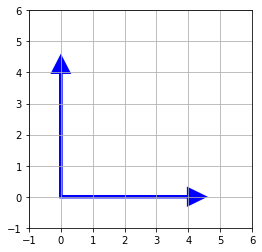

In [147]:
# setting figure so that x and y are symmetrical

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,6)
plt.ylim(-1,6)

for letter in [a,b]: #using for loop to plot a and b
  plt.arrow(0,0,
            letter[0],
            letter[1],
            head_width=.5,
            head_length=.5,
            linewidth=3,
            color='blue')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [148]:
# not orthogonal because dot product does not = 0
a = [-5,3,7]
b = [6,-8, 2]
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [164]:
c = np.array([2, -15, 6, 20]) # heres my vector c
norm_c = np.linalg.norm(c) # calculating the norm of c
norm_c_sq = norm_c**2 # squaring the norm of c
print(c,'\n Norm of c:',norm_c, '\n Norm of c squared:', norm_c_sq)

[  2 -15   6  20] 
 Norm of c: 25.787593916455254 
 Norm of c squared: 665.0


In [166]:
# mulpity the vector
c * c

array([  4, 225,  36, 400])

In [170]:
c.T * c # same result as c*c

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [171]:
f = [4,12,11,9,2] # here vector f
norm_f = np.linalg.norm(f) #calculating the norm of f
norm_f

19.131126469708992

In [173]:
# finding its unit vector
f_hat = f/np.linalg.norm(f) #divide f by its norm
f_hat # vector f's unit vector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [174]:
# Linearly dependent vectors
v_1 = np.array([-1.5, 5])
v_2 = np.multiply(v_1, 2)
print(v_1, '\n', v_2)


[-1.5  5. ] 
 [-3. 10.]


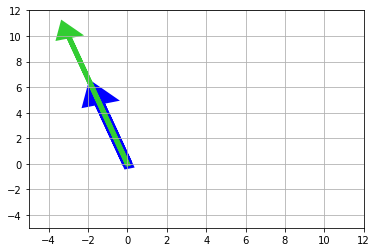

In [181]:
# plotting vectors
fig, ax = plt.subplots()
ax.grid()
plt.xlim(-5,12)
plt.ylim(-5,12)

for vector, colors, width in [(v_1, 'blue', 10),
                             (v_2, 'limegreen', 5)]:
  plt.arrow(0,0,
            vector[0],
            vector[1],
            head_width=1,
            head_length=1,
            linewidth=width,
            color=colors)
                         

In [182]:
# Linearly independent vectors

v_3 = np.array([-2,2])
v_4 = np.array([2,0])
print(v_3, '\n', v_4)

[-2  2] 
 [2 0]


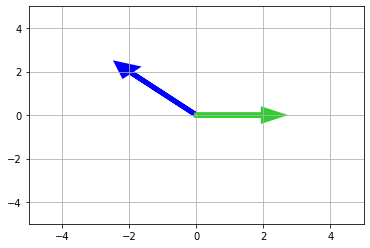

In [187]:
# using same code from above
# plotting independent vectors
fig, ax = plt.subplots()
ax.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)

for vector, colors, width in [(v_3, 'blue', 5),
                             (v_4, 'limegreen', 5)]:
  plt.arrow(0,0,
            vector[0],
            vector[1],
            head_width=.5,
            head_length=.5,
            linewidth=width,
            color=colors)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

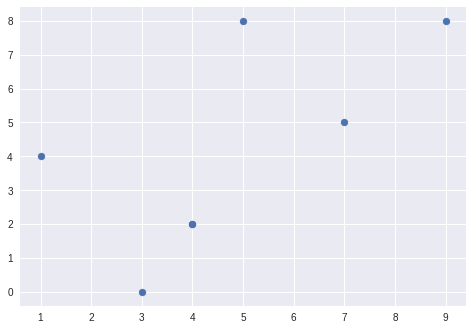

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()